<a href="https://colab.research.google.com/github/LOW-Lucas/Alura_DataScience/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importando as Bibliotecas

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento dos Dados

In [15]:
dados = pd.read_json("https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json")

In [16]:
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


# Exploração Inicial

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [18]:
dados.shape

(7267, 6)

In [19]:
colunas = list(dados.columns)
colunas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

# Tratamento as Inconsistências

In [20]:
print(type(dados['customer'].iloc[0]))
print(dados['customer'].iloc[0])

<class 'dict'>
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}


In [21]:
try:
    customer_dados = pd.json_normalize(dados['customer'])
    phone_dados = pd.json_normalize(dados['phone'])
    internet_dados = pd.json_normalize(dados['internet'])
    account_dados = pd.json_normalize(dados['account'])

    dados = pd.concat([
        dados.drop(['customer', 'phone', 'internet', 'account'], axis=1),
        customer_dados,
        phone_dados,
        internet_dados,
        account_dados
    ], axis=1)

    dados = dados.drop_duplicates()
    cat_columns = dados.select_dtypes(include=['object']).columns
    dados[cat_columns] = dados[cat_columns].astype('category')
    print("\DataFrame após o tratamento:")
    print(dados.info())

except Exception as e:
    print(f"Erro ao processar os dados: {str(e)}")

\DataFrame após o tratamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   category
 1   Churn             7267 non-null   category
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   int64   
 4   Partner           7267 non-null   category
 5   Dependents        7267 non-null   category
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   category
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category

# Criação da Coluna (Contas_Diarias)

In [22]:
dados['Contas_Diarias'] = dados['Charges.Monthly'] / 30
print("Estatísticas -- Contas_Diarias:")
dados['Contas_Diarias'].describe()

Estatísticas -- Contas_Diarias:


,Contas_Diarias
count,7267.000000
mean,2.157337
std,1.004319
min,0.608333
25%,1.180833
50%,2.343333
75%,2.995833
max,3.958333


# Análise Descritiva

In [23]:
print("Análise das variáveis numéricas:")
print(dados.describe())

print("\nDistribuição das variáveis em formato categórico:")
for col in dados.select_dtypes(['category']).columns:
    print(f"\n{col}:")
    print(dados[col].value_counts())

Análise das variáveis numéricas:
       SeniorCitizen       tenure  Charges.Monthly  Contas_Diarias
count    7267.000000  7267.000000      7267.000000     7267.000000
mean        0.162653    32.346498        64.720098        2.157337
std         0.369074    24.571773        30.129572        1.004319
min         0.000000     0.000000        18.250000        0.608333
25%         0.000000     9.000000        35.425000        1.180833
50%         0.000000    29.000000        70.300000        2.343333
75%         0.000000    55.000000        89.875000        2.995833
max         1.000000    72.000000       118.750000        3.958333

Distribuição das variáveis em formato categórico:

customerID:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int

# Análise de Evasão -- Churn


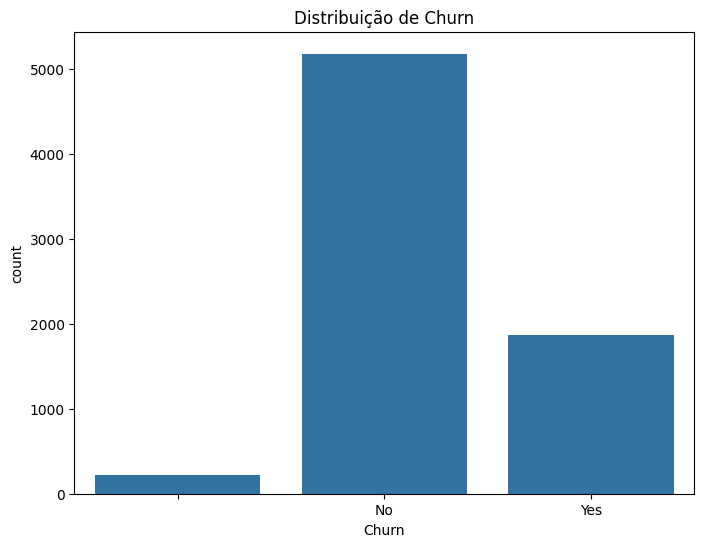


Percentual de Churn:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dados, x='Churn')
plt.title('Distribuição de Churn')
plt.show()

print("\nPercentual de Churn:")
print(dados['Churn'].value_counts(normalize=True) * 100)

# Visualizações por Categorias

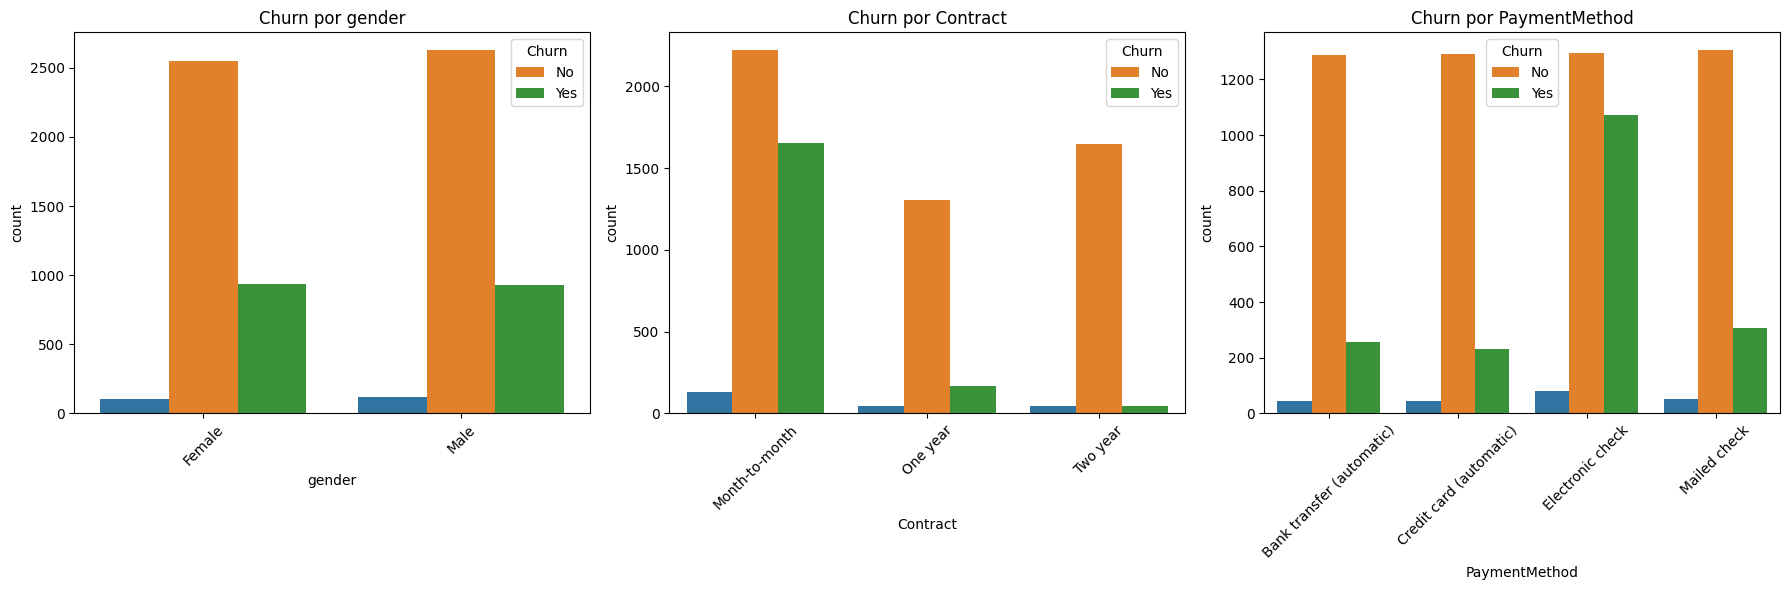

In [25]:
cat_vars = ['gender', 'Contract', 'PaymentMethod']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, var in enumerate(cat_vars):
    sns.countplot(data=dados, x=var, hue='Churn', ax=axes[i])
    axes[i].set_title(f"Churn por {var}")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Análise de Correlações

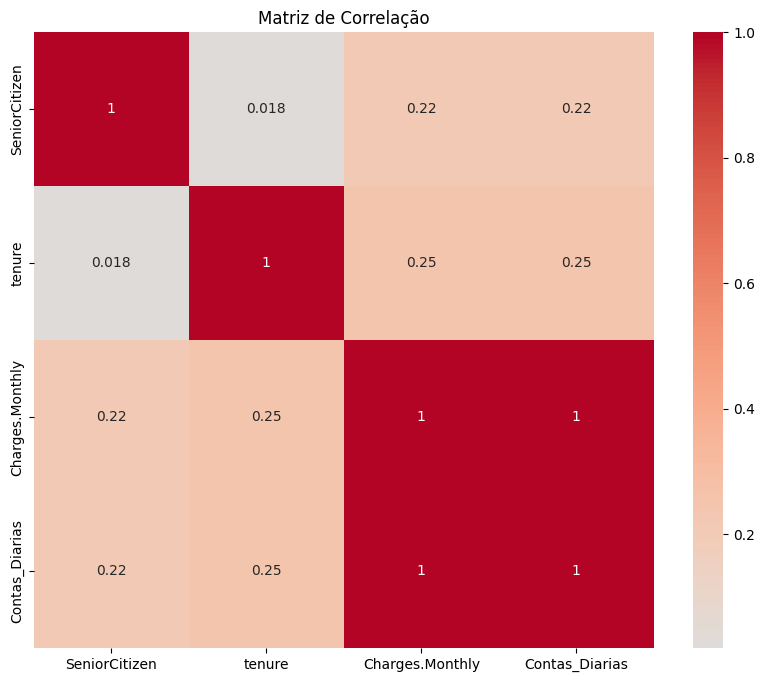

In [26]:
num_vars = dados.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(dados[num_vars].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

#Relatorio Final




## 1 -- Introdução

  Este relatório apresenta os   resultados de uma análise aprofundada sobre a evasão de clientes (Churn) na empresa Telecom X, visando identificar fatores que contribuem para a saída de clientes e propor estratégias de retenção.


## 2 -- Limpeza e Tratamento de Dados

  *   Importação dos dados via API JSON
  *   Normalização das colunas aninhadas
  *   Remoção de duplicatas
  *   Conversão apropriada dos tipos de dados
  *   Criação da coluna de custos diários

## 3 -- Análise Exploratória

  3.1 - Visão Geral
  *   Taxa de Evasão: 25.72% dos clientes cancelaram o serviço
  *   Taxa de Retenção: 71.20% permaneceram como clientes

  3.2 - Perfil dos Clientes

  *  Tempo médio de permanência: 32.3 meses
  *  Valor médio da conta mensal: R$ 64.72
  *  16.3% são clientes idosos

  3.3 - Distribuição de Serviços

-- Internet:

*   Fibra Ótica: 44.0%
*   DSL: 34.2%
*   Sem Internet: 21.8%

-- Contratos:
*   Mensal: 55.1%
*   Dois Anos: 24.0%
*   Um Ano: 20.9%

## 4 -- Conclusões e Insights

  *   Uma taxa de evasão de 25.72% é considerável alarmante, sendo necessário atenção.
  *   Contratos mensais tem um maior destaque, sendo optado por mais da metade dos clientes (55.2%).
  *   Fibra ótica é o serviço de internet maior destaque.
  *   O tempo médio de permanência é contínuo, indicando uma base de clientes relativamente estável.

## 5 -- Recomendações

  *   Incentivar Contratos de Longo Prazo:
  Oferecer descontos ou criação de planos com maiores vantagens para incentivar a migração de contratos mensais para anuais.

  *   Monitorar Clientes de Fibra Óptica:
  Incentivar os clientes de Fibra Óptica a participarem de pesquisas de satisfação para identificar pontos de insatisfação.

  *   Maior atenção aos Clientes Idosos:
  Oferecer canais de suporte mais acessíveis e simplificados, e oferecer pacotes de serviços adaptados para clientes idosos.

  *  Precificação Estratégica:
  Avaliar a política de precificação, levando em consideração o preço médio de R$ 64.72.

  *   Promover Serviços de Valor Agregado:
  Reforçar a importância de outros serviços oferecidos, como Segurança Online, Suporte Técnico e Pesquisa de Qualidade.